In [1]:
%pylab inline
import math
import random
import pandas as pd
import numpy as np
from glass_input.cloud_packer import CloudPacker
from glass_input.cloud_packer2 import CloudPacker2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
IMAGE_WIDTH = 1280
IMAGE_HEIGHT = 720
def generate_random_windows(number_windows = 10):
   windows = []

   for n in range(number_windows):
      windows.append({"window": n,
                      "w": random.randint(0, math.floor(IMAGE_WIDTH / 3)),
                      "h": random.randint(0, math.floor(IMAGE_HEIGHT / 4))})

   return windows

In [3]:
myblocks3 = generate_random_windows(number_windows = 3)
myblocks4 = generate_random_windows(number_windows = 4)
myblocks5 = generate_random_windows(number_windows = 5)
myblocks6 = generate_random_windows(number_windows = 6)
myblocks7 = generate_random_windows(number_windows = 7)
myblocks20 = generate_random_windows(number_windows = 20)


In [4]:

MARGIN = 0.1


def cloud_packer_test(number_windows=10, view_width=IMAGE_WIDTH, view_height=IMAGE_HEIGHT, margin=MARGIN, Packer=CloudPacker):
    return cloud_packer_test_blocks(generate_random_windows(number_windows), view_width=view_width, view_height=view_height, margin=margin, Packer=Packer)

def cloud_packer_test_blocks(blocks, view_width=IMAGE_WIDTH, view_height=IMAGE_HEIGHT, margin=MARGIN, Packer=CloudPacker):
    #print(f"{blocks}\n")
    
    maxw = max([shape["w"] for shape in blocks])
    maxh = max([shape["h"] for shape in blocks])
    minw = min([shape["w"] for shape in blocks])
    minh = min([shape["h"] for shape in blocks])
    packer = Packer(minw=minw, minh=minh)

    blocks = packer.fit(blocks, view_width=view_width, view_height=view_height, margin=margin * maxw)
    #print(f"packed blocks: {blocks}\n")

    plt.figure(figsize=(16, 9))
    ax = plt.gca()
    minx = maxx = blocks[0]["fit"]["x"]
    miny = maxy = blocks[0]["fit"]["y"]
    for shape in blocks:
      color = "#" + ''.join([random.choice('ABCDEF0123456789') for _ in range(6)])
      ax.add_patch(
          Rectangle(
              (shape["fit"]["x"], shape["fit"]["y"]),
              shape["w"], shape["h"],
              edgecolor=color, color=color, alpha=0.5))
      if "explanation" in shape["fit"]:
          ax.text(shape["fit"]["x"], shape["fit"]["y"], shape["fit"]["explanation"])
      if shape["fit"]["x"] < minx: minx = shape["fit"]["x"]
      if shape["fit"]["x"] + shape["w"] > maxx: maxx = shape["fit"]["x"] + shape["w"]
      if shape["fit"]["y"] < miny: miny = shape["fit"]["y"]
      if shape["fit"]["y"] + shape["h"] > maxy: maxy = shape["fit"]["y"] + shape["h"]

    if hasattr(packer, "bboxes"):
        for bbox in packer.bboxes:
            color = "#" + ''.join([random.choice('ABCDEF0123456789') for _ in range(6)])
            ax.add_patch(
                Rectangle((bbox["min"]["x"], bbox["min"]["y"]),
                          bbox["max"]["x"] - bbox["min"]["x"], bbox["max"]["y"] - bbox["min"]["y"],
              edgecolor="black", fill=False))

    if hasattr(packer, "bbox_aspect_ratio"):
        print("Packed aspect ratio", packer.bbox_aspect_ratio)
            
    plt.ylim(miny, maxy)
    plt.xlim(minx, maxx)

    return packer

/tmp/ipykernel_2216/3432536328.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Rectangle(


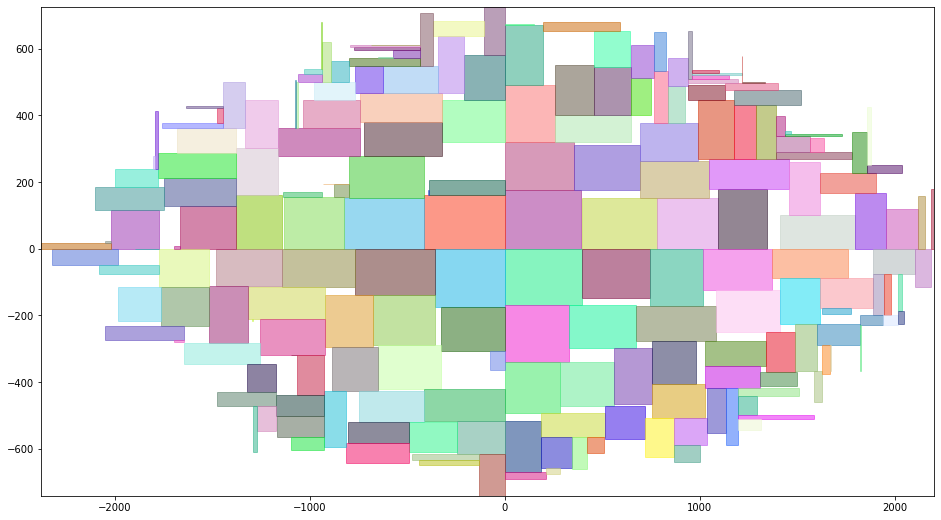

In [24]:
p = cloud_packer_test(200, Packer=lambda minw, minh, **kw: CloudPacker())
px = np.array([p.get_position(i) for i in p.iss])
#plt.scatter(px[:,0], px[:,1], s=1)
plt.show()

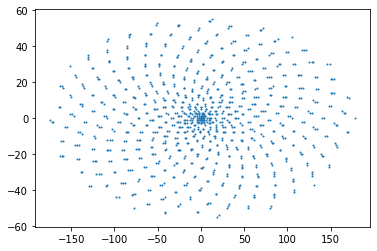

In [12]:
p = CloudPacker(step=.1, radius=1)
p.fit([], IMAGE_WIDTH, IMAGE_HEIGHT, margin=MARGIN, sorting="organic")

px = np.array([p.get_position(i) for i in linspace(0, 360000, 1000)])
plt.scatter(px[:,0], px[:,1], s=1)

In [20]:
px

array([[640, 360],
       [640, 360],
       [640, 360],
       ...,
       [640, 360],
       [640, 360],
       [640, 360]])

[{'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680070}, {'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680116}, {'w': 0.5278125, 'h': 0.410625, 'window': 20971652}]

packed blocks: [{'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680070, 'fit': {'x': -22.327968755960466, 'y': -7.188906261920929}}, {'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680116, 'fit': {'x': -21.327968755960466, 'y': -7.188906261920929}}, {'w': 0.5278125, 'h': 0.410625, 'window': 20971652, 'fit': {'x': -20.26390625, 'y': -7.2053125}}]



/tmp/ipykernel_16509/679962604.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Rectangle(


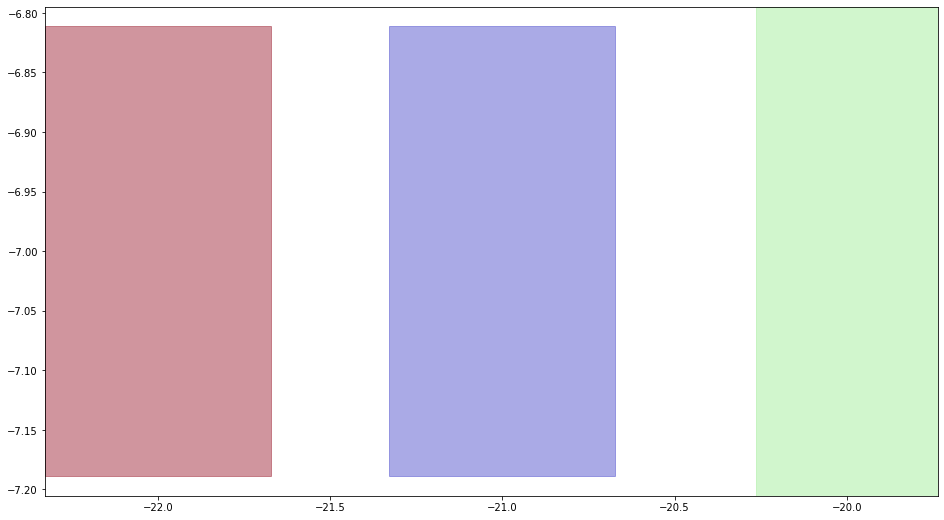

In [8]:
cloud_packer_test_blocks([{'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680070},
  {'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680116},
  {'w': 0.5278125, 'h': 0.410625, 'window': 20971652}], view_width=1.0, view_height=0.6000000238418579, margin=0,
                        Packer=CloudPacker)